# Import library and set path for data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
train_images = "Data\\train-images.idx3-ubyte"
train_labels = "Data\\train-labels.idx1-ubyte"
test_images = "Data\\t10k-images.idx3-ubyte"
test_labels = "Data\\t10k-labels.idx1-ubyte"

# Read data

**TRAINING SET LABEL FILE (train-labels-idx1-ubyte):**
| Offset | Type           | Value            | Description          |
|:-------|:---------------|:-----------------|:---------------------|
| 0000   | 32 bit integer | 0x00000801(2049) | magic number (MSB first) |
| 0004   | 32 bit integer | 60000            | number of items      |
| 0008   | unsigned byte  | ??               | label                |
| 0009   | unsigned byte  | ??               | label                |
| ...... | .............. | ............... | ...............      |
| xxxx   | unsigned byte  | ??               | label                |

The labels values are 0 to 9.

**TRAINING SET IMAGE FILE (train-images-idx3-ubyte):**
| Offset | Type           | Value            | Description          |
|:-------|:---------------|:-----------------|:---------------------|
| 0000   | 32 bit integer | 0x00000803(2051) | magic number         |
| 0004   | 32 bit integer | 60000            | number of images     |
| 0008   | 32 bit integer | 28               | number of rows       |
| 0012   | 32 bit integer | 28               | number of columns    |
| 0016   | unsigned byte  | ??               | pixel                |
| 0017   | unsigned byte  | ??               | pixel                |
| ...... | .............. | ............... | ...............      |
| xxxx   | unsigned byte  | ??               | pixel                |

Pixels are organized row-wise. Pixel values are 0 to 255. 0 means background (white), 255 means foreground (black).

**TEST SET LABEL FILE (t10k-labels-idx1-ubyte):**
| Offset | Type           | Value            | Description          |
|:-------|:---------------|:-----------------|:---------------------|
| 0000   | 32 bit integer | 0x00000801(2049) | magic number (MSB first) |
| 0004   | 32 bit integer | 10000            | number of items      |
| 0008   | unsigned byte  | ??               | label                |
| 0009   | unsigned byte  | ??               | label                |
| ...... | .............. | ............... | ...............      |
| xxxx   | unsigned byte  | ??               | label                |

The labels values are 0 to 9.

**TEST SET IMAGE FILE (t10k-images-idx3-ubyte):**
| Offset | Type           | Value            | Description          |
|:-------|:---------------|:-----------------|:---------------------|
| 0000   | 32 bit integer | 0x00000803(2051) | magic number         |
| 0004   | 32 bit integer | 10000            | number of images     |
| 0008   | 32 bit integer | 28               | number of rows       |
| 0012   | 32 bit integer | 28               | number of columns    |
| 0016   | unsigned byte  | ??               | pixel                |
| 0017   | unsigned byte  | ??               | pixel                |
| ...... | .............. | ............... | ...............      |
| xxxx   | unsigned byte  | ??               | pixel                |


In [2]:
def readLabel(filename,max_size = None):
    with open(filename,"rb") as file:
        list_labels = []
        magic_num = int.from_bytes(file.read(4),"big") 
        num_items = int.from_bytes(file.read(4),"big")
        if max_size:
            num_items = max_size
        for each_item in range(num_items):
            each_label = int.from_bytes(file.read(1),"big") 
            list_labels.append(each_label)
    return list_labels
def readImage(filename,max_size = None):
    with open(train_images,"rb") as file:
        list_labels = []
        magic_num = int.from_bytes(file.read(4),"big") 
        num_images = int.from_bytes(file.read(4),"big") 
        num_rows = int.from_bytes(file.read(4),"big")
        num_cols = int.from_bytes(file.read(4),"big")
        if max_size:
            num_images = max_size
        for each_image in range(num_images):
            list_each_image = []
            for each_row in range(num_rows):
                #list_each_row = []
                for each_col in range(num_cols):
                    #list_each_row.append(int.from_bytes(file.read(1),"big"))
                    list_each_image.append(int.from_bytes(file.read(1),"big"))
                #list_each_image.append(list_each_row)
            list_labels.append(list_each_image)
        return list_labels
    

In [3]:
images_train_dataset = readImage(train_images,100)
labels_train_dataset = readLabel(train_labels,100)
images_test_dataset = readImage(test_images,100)
labels_test_dataset = readLabel(test_labels,100)

### Test transfer from list bytes to images

In [4]:
print(len(images_train_dataset))
print(len(images_train_dataset[0]))

100
784


100


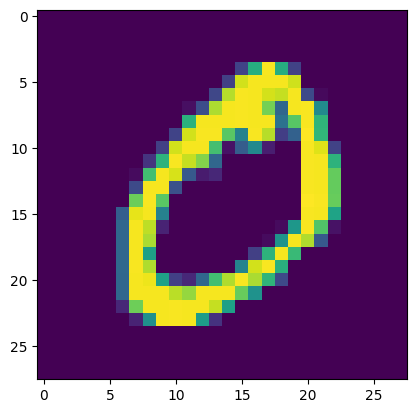

2


In [23]:
print(len(images_test_dataset))
import matplotlib.pyplot as plt
image_array = np.array(images_test_dataset[1])
image_matrix = image_array.reshape(28, 28)
image = np.asarray(image_matrix).squeeze()
plt.imshow(image)
plt.show()
print(labels_test_dataset[1])

# K-NN model

In [25]:
def Euclidean(x, y):
    return (sum((x_i-y_i)**2 for x_i,y_i in zip(x,y)))**0.5
# vector1 = [1, 2, 3]
# vector2 = [4, 5, 6]
# print(Euclidean(vector1,vector2))
def matrixDistance(trains,test): #calculate the distance between 1 test list to [] train lists
    list_distance = []
    for train_image in trains:
        list_distance.append(Euclidean(train_image,test))
    return list_distance

def knn(images_train,images_test,labels_train,k=5):
    y_test = []
    for each_test_image in images_test:
        distance = matrixDistance(images_train,each_test_image) #1-dimension list
        k_nearest_indices = np.argsort(distance)[:k]
        k_nearest_labels = [labels_train[i] for i in k_nearest_indices]
        label_counts = {}
        for label in k_nearest_labels:
            label_counts[label] = label_counts.get(label, 0) + 1
        # Find majority label
        majority_label = max(label_counts, key=label_counts.get)
        y_test.append(majority_label)
    return y_test

In [26]:
result = knn(images_train_dataset,images_test_dataset,labels_train_dataset)
print(result)

[3, 0, 4, 1, 9, 9, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 7, 8, 6, 9, 4, 0, 9, 1, 1, 2, 4, 3, 7, 7, 3, 8, 6, 7, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 1, 5, 3, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 1, 6, 0, 6, 5, 6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 1, 1, 1, 7, 9, 0, 2, 6, 7, 8, 1, 9, 0, 4, 6, 7, 4, 6, 8, 0, 9, 8, 3, 1]


## CNN - Convolutional Neural Network